In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

#caricamento file 
file_path = "california_housing_data.csv"
df = pd.read_csv(file_path)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [58]:
#df = df.drop(columns=['MedInc'])
#df = df.drop(columns=['Population'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [59]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col].between(lower, upper), df[col], np.nan)

df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16312 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16312 non-null  float64
 1   HouseAge     16312 non-null  float64
 2   AveRooms     16312 non-null  float64
 3   AveBedrms    16312 non-null  float64
 4   Population   16312 non-null  float64
 5   AveOccup     16312 non-null  float64
 6   Latitude     16312 non-null  float64
 7   Longitude    16312 non-null  float64
 8   MedHouseVal  16312 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [60]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**METRICHE DI REGRESSIONE LINEARE** <br>

- **MAE**: Mean Absolute Error, media assoluta tra valore predetto e valore attuale. È una misurazione delle tipiche discrepanze assolute tra i valori effettivi di un set di dati e i valori predetti.

- **MSE**: Mean Squared Error, media quadratica tra valore predetto e valore attuale. Viene utilizzato per valutare quanto bene funzionano i modelli predittivi.

- **R^2**: R-squared, quantifica la percentuale della variazione della variabile dipendente a cui le variabili indipendenti contribuiscono. Utile per valutare l'efficacia complessiva e il potere esplicativo di un modello di regressione, chiamato anche coefficiente di determinazione.

- **RMSE**: Root Mean Squared Error, radice della media quadratica tra valore predetto e valore attuale. Usata per misurare l'accuratezza o la bontà di un modello predittivo.

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

MAE: 0.42361889744557485
MSE: 0.3102000375145813
R2: 0.64368216739238
RMSE: 0.5569560463039981


**RISULTATI TEST** <br>

- df = df.drop(columns=['MedInc']), (test_size=0.3, random_state=42), con StandardScaler:
    - MAE: 0.6713261610064607
    - MSE: 0.7714182051646131
    - R2: 0.4122707560918122
    - RMSE: 0.8783041643784989

- df = df.drop(columns=['MedInc']), (test_size=0.3, random_state=42), senza StandardScaler:
    - MAE: 0.6713261610064636
    - MSE: 0.7714182051646145
    - R2: 0.4122707560918112
    - RMSE: 0.8783041643784996

- df = df.drop(columns=['MedInc']), (test_size=0.2, random_state=42), con StandardScaler: 
    - MAE: 0.670828262463704
    - MSE: 0.777956088019748
    - R2: 0.40632573422682083
    - RMSE: 0.8820181902998079
- df = df.drop(columns=['MedInc']), (test_size=0.2, random_state=42), senza StandardScaler: 
    - MAE: 0.6708282624637023
    - MSE: 0.777956088019748
    - R2: 0.40632573422682083
    - RMSE: 0.8820181902998079

- df = df.drop(columns=['MedInc']), (test_size=0.3, random_state=41), con StandardScaler: 
    - MAE: 0.670828262463704
    - MSE: 0.777956088019748
    - R2: 0.40632573422682083
    - RMSE: 0.8820181902998079

- df = df.drop(columns=['MedInc']), (test_size=0.3, random_state=41), senza StandardScaler: 
    - MAE: 0.6888627942874281
    - MSE: 0.8138429030074396
    - R2: 0.38923885956437143
    - RMSE: 0.90213241988493

- (test_size=0.3, random_state=42), con StandardScaler:
    - MAE: 0.5272474538305952
    - MSE: 0.5305677824766754
    - R2: 0.5957702326061662
    - RMSE: 0.7284008391515453

- (test_size=0.3, random_state=42), senza StandardScaler:
    - MAE: 0.5272474538305947
    - MSE: 0.5305677824766752
    - R2: 0.5957702326061665
    - RMSE: 0.7284008391515452

- df = df.drop(columns=['MedInc']), df = df.drop(columns=['Population']), (test_size=0.3, random_state=42), senza StandardScaler:
    - MAE: 0.6714153988855555
    - MSE: 0.7715559328418239
    - R2: 0.4121658239252515
    - RMSE: 0.8783825663353206

- (test_size=0.3, random_state=42), con StandardScaler, senza outlier: 
    - MAE: 0.42361889744557485
    - MSE: 0.3102000375145813
    - R2: 0.64368216739238
    - RMSE: 0.5569560463039981


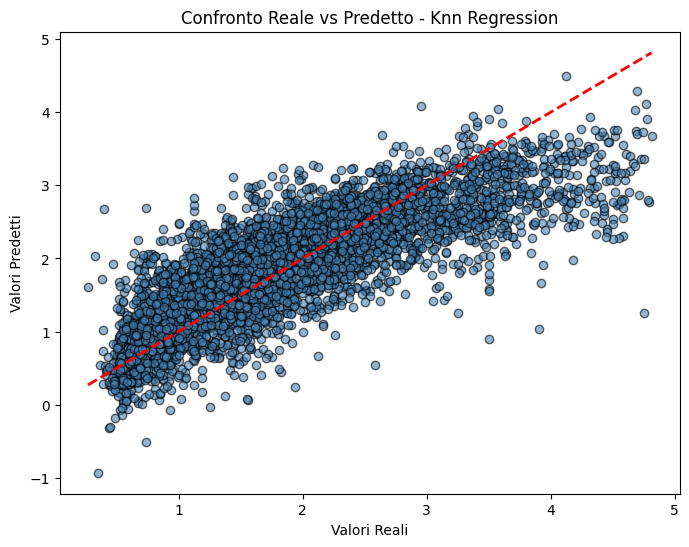

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color="steelblue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # linea ideale
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Confronto Reale vs Predetto - Knn Regression")
plt.show()

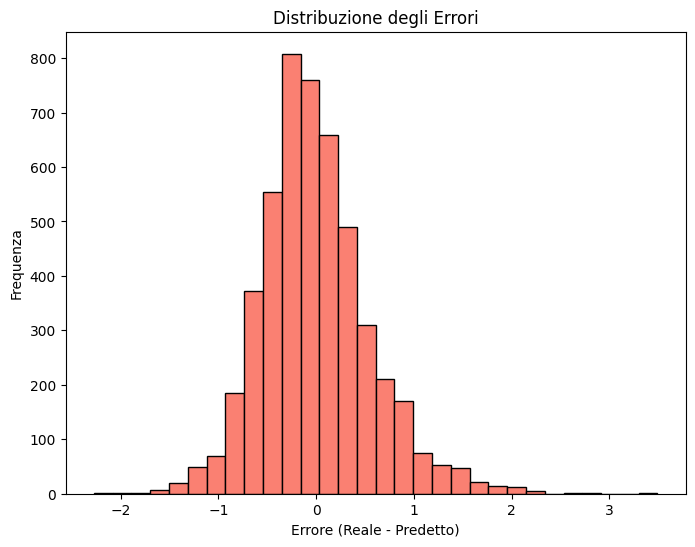

In [65]:
errors = y_test - predictions

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, color="salmon", edgecolor="black")
plt.xlabel("Errore (Reale - Predetto)")
plt.ylabel("Frequenza")
plt.title("Distribuzione degli Errori")
plt.show()

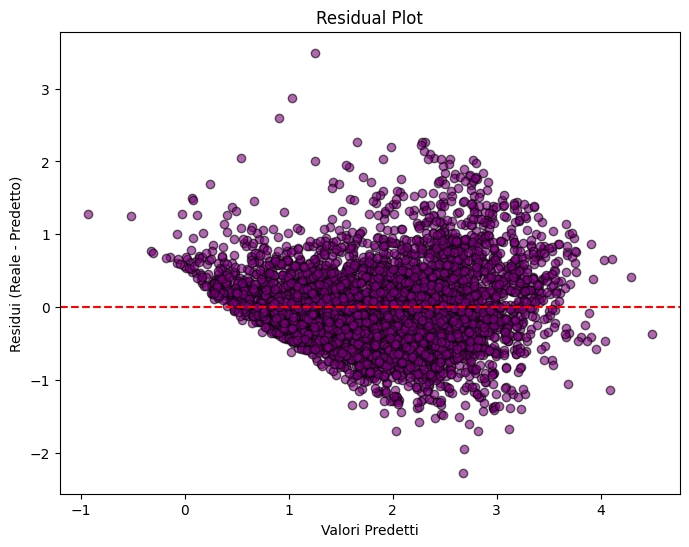

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(predictions, errors, alpha=0.6, color="purple", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valori Predetti")
plt.ylabel("Residui (Reale - Predetto)")
plt.title("Residual Plot")
plt.show()
